<a href="https://colab.research.google.com/github/ndtuan10/DeepLearning_CS431.L21.KHCL/blob/main/BaiTap/BaiTap2_transfer_learning_VGG16%2BCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BÀI TẬP 2**

**Môn : Các kỹ thuật học sâu và ứng dụng - CS313.L11.KHCL**
 
***Yêu cầu:*** Cài đặt mạng CNN dựa trên Transfered Model VGG16 và tập dataset là CIFAR-10

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Thư viện được sử dụng
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import time
print('''
  Phiên bản của các thư viện :
    + Tensorflow : {0}
    + keras : {1}
    + numpy : {2}
    + matplotlib : {3}
    + pandas : {4}
'''.format(tf.__version__, keras.__version__, np.__version__, matplotlib.__version__, pd.__version__))


  Phiên bản của các thư viện :
    + Tensorflow : 2.4.1
    + keras : 2.4.0
    + numpy : 1.19.5
    + matplotlib : 3.2.2
    + pandas : 1.1.5



#**1.Giới thiệu về Dataset CIFAR10**
 Dataset CIFAR-10 bao gồm 60.000 ảnh màu có kích thươc (32x32 pixels) với 10 *lớp*, tương ứng với 6000 ảnh cho mỗi lớp. Tập dữ liệu này bao gồm 50.000 ảnh cho tập train và còn lại 10.000 ảnh cho tập test. 

 *Nhãn* là một mảng của các số nguyên từ 0 đến 9, tương ứng với mỗi *lớp* được định nghĩa theo bảng sau:

<table>
  <tr>
    <th>Nhãn</th><th>0</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th><th>7</th><th>8</th><th>9</th>
    
  </tr>
  <tr>
    <td>Loại</td>
    <td>Máy bay</td>
    <td>Ô tô</td>
    <td>Chim</td>
    <td>Mèo</td>
    <td>Hươu</td>
    <td>Chó</td>
    <td>Ếch</td>
    <td>Ngựa</td>
    <td>Tàu</td>
    <td>Xe tải</td>
  </tr>
</table>


 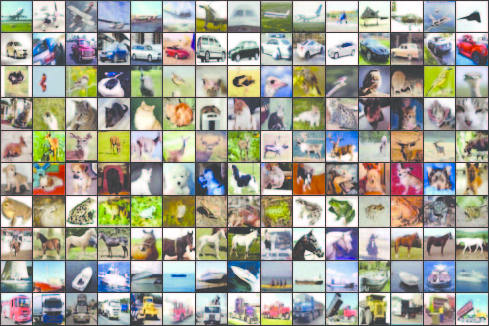

 Ta sẽ load dataset trực tiếp từ chính thư viện [keras](https://keras.io/api/datasets/cifar10/) đã được tích hợp sẵn.


#**2.Khai phá dữ liệu**

In [ ]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import cifar10
tf.random.set_seed(248)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Sau khi tải, dữ liệu được trả về với kiểu dữ liệu numpy.ndarray (mảng n chiều) được gán cho 4 biến : 

*x_train* , *y_train* , *x_test* , *y_test*.

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
# Khai phá dữ liệu 
print("In kích thước của tập train: ",x_train.shape)
print("Số lượng nhãn tương ứng của tập train: ", len(y_train))
print("In kích thước của tập test: ",x_test.shape)
print("Số lượng nhãn tương ứng của tập train: ", len(y_test))
result = {
    'Data':["x_train", "y_train", "x_test", "y_test"],
    'Shape': [x_train.shape, y_train.shape, x_test.shape, y_test.shape]
}
pd.DataFrame(result)

In kích thước của tập train:  (50000, 32, 32, 3)
Số lượng nhãn tương ứng của tập train:  50000
In kích thước của tập test:  (10000, 32, 32, 3)
Số lượng nhãn tương ứng của tập train:  10000


,Data,Shape
0,x_train,"(50000, 32, 32, 3)"
1,y_train,"(50000, 1)"
2,x_test,"(10000, 32, 32, 3)"
3,y_test,"(10000, 1)"


#**3. Tiền xử lý dữ liệu**

Dữ liệu cần được xử lý trước khi được dùng để huấn luyện mạng CNN. Mỗi ảnh là một mảng NumPy 2 chiều, 32x32, với mỗi pixel có giá trị từ 0 đến 255. Phân tích ảnh đầu tiên trong tập dữ liệu, chúng ta sẽ thấy các pixel có giá trị từ 0 đến 255:

[6]


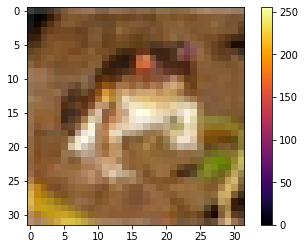

In [ ]:
plt.figure()
print(y_train[0])
plt.imshow(x_train[0], cmap="inferno")
plt.colorbar()
plt.show()

[9]


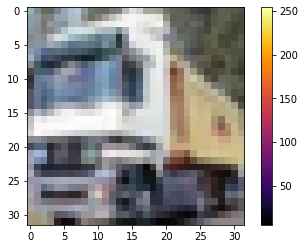

In [ ]:
plt.figure()
print(y_train[1])
plt.imshow(x_train[1], cmap="inferno")
plt.colorbar()
plt.show()

Ta cần xử lý để mỗi một điểm ảnh có giá trị nằm trong khoảng từ 0 đến 1 (tức trong khoảng là 0% đến 100%). Để làm điều này, chúng ta chỉ cần lấy giá trị của pixel chia cho 255.

In [ ]:
# Chuẩn hóa dữ liệu
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
# Chuyển đổi sang one hot vector
y_test_oh = tf.one_hot(y_test[:,0], 10)
y_train_oh = tf.one_hot(y_train[:,0], 10)

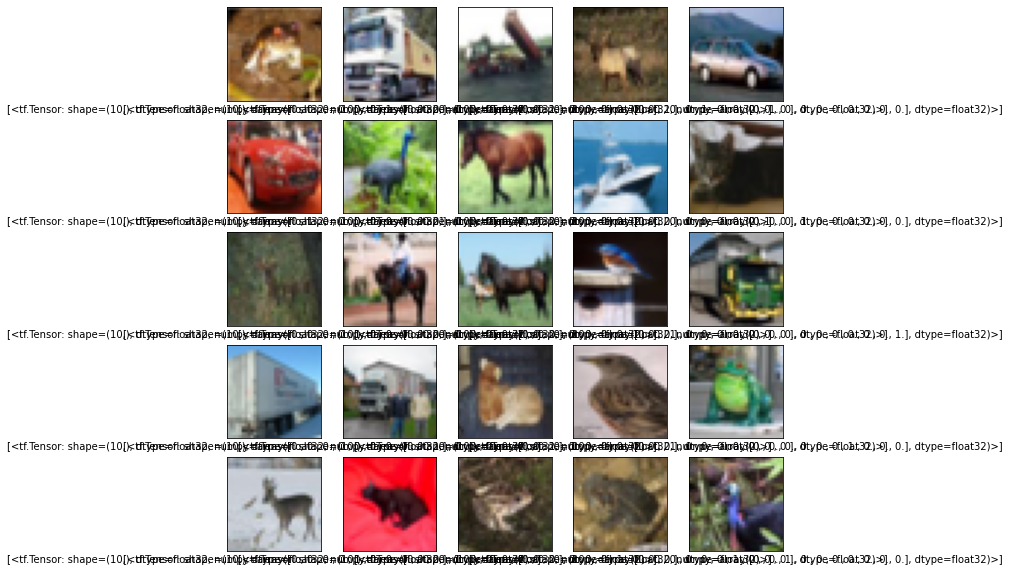

In [ ]:
# in ra 25 đầu tiên trong tập train sau khi chuẩn hóa
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train_oh[i]])
plt.show()

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)
Size of input:  (50000, 32, 32, 3)


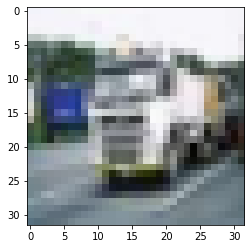

In [ ]:
index = 1000
print(y_train_oh[index])
plt.imshow(x_train[index])
print('Size of input: ', x_train.shape)

#**4.Train mô hình**

In [ ]:
# download mô hình VGG16
vgg = tf.keras.applications.VGG16(include_top=False, 
                                  input_shape=(32, 32,3 ),
                                  )

In [ ]:
# giúp debug và in ra kiến trúc của mô hình 
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
x = tf.zeros((8, 32, 32,3))
y = vgg(x)

In [ ]:
y.shape

TensorShape([8, 1, 1, 512])

##**4.1 Thiết lập mô hình**

In [ ]:
x = tf.zeros((8, 512, 128 ,256))
pool_layer = tf.keras.layers.GlobalAvgPool2D()
y = pool_layer(x)
y.shape

TensorShape([8, 256])

In [ ]:
# Xây dựng kiến trúc mạng sử dụng thủ tục Average pooling 
cifar_net = tf.keras.Sequential(
    [
     vgg,
     tf.keras.layers.GlobalAvgPool2D(),
     tf.keras.layers.Dense(10)
    ]
)

In [ ]:
cifar_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = tf.zeros((8, 32, 32, 3))
y = cifar_net(x)
y.shape

TensorShape([8, 10])

##**4.2 Biên dịch mô hình**
Trước khi mô hình có thể được huấn luyện, chúng ta cần thêm các hàm toán học giúp cho việc đánh giá hay làm mô hình đi " đúng hướng ". Các chỉnh sửa này được thêm vào trong bước *biên dịch* của mô hình:

* *Hàm mất mát* — dùng để tính toán "độ sai sót" của mô hình trong quá trình huấn luyện và dự đoán. Chúng ta cần phải làm cho nghiệm của hàm này nhỏ nhất để kiểm soát mô hình đi đúng hướng. (mất mát càng ít, chính xác càng cao). *Hàm mất mát* hay *loss function* được sử dụng là `mean squared error`.
* *Hàm tối ưu* — Đây là "công cụ" để làm hàm mất mát có nghiệm nhỏ nhất, qua việc cập nhật và chỉnh sửa các tham số có trong hàm mất mát. *Hàm tối ưu* hay *optimizier function* được sử dụng là `Stochastic Gradient Descent (SGD)`.
* *Thang đo* — dùng để đo đạc độ chính xác qua mỗi quá trình huấn luyện và kiểm tra. Chúng ta sẽ sử dụng phép đo `accuracy`, nhằm nắm được tỉ lệ ảnh được phân loại chính xác.

In [ ]:
# Biên dịch mô hình
sgd = tf.keras.optimizers.SGD()
cifar_net.compile(
    optimizer=sgd,
    loss = tf.keras.losses.MeanSquaredError()
)

##**4.3 Train mô hình**

In [ ]:
# đưa dữ liệu vào và huấn luyện
start = time.time()
cifar_net.fit(x_train, y_train_oh, batch_size=128, epochs=70)
stop = time.time()
cifar_net_time = {stop - start}
print(f"Training time: {cifar_net_time}s")

Epoch 1/70
391/391 [==============================] - 24s 55ms/step - loss: 0.0967
Epoch 2/70
391/391 [==============================] - 21s 53ms/step - loss: 0.0666
Epoch 3/70
391/391 [==============================] - 21s 54ms/step - loss: 0.0592
Epoch 4/70
391/391 [==============================] - 21s 54ms/step - loss: 0.0538
Epoch 5/70
391/391 [==============================] - 21s 53ms/step - loss: 0.0500
Epoch 6/70
391/391 [==============================] - 21s 53ms/step - loss: 0.0464
Epoch 7/70
391/391 [==============================] - 21s 53ms/step - loss: 0.0446
Epoch 8/70
391/391 [==============================] - 21s 54ms/step - loss: 0.0425
Epoch 9/70
391/391 [==============================] - 21s 54ms/step - loss: 0.0412
Epoch 10/70
391/391 [==============================] - 21s 53ms/step - loss: 0.0398
Epoch 11/70
391/391 [==============================] - 21s 53ms/step - loss: 0.0387
Epoch 12/70
391/391 [==============================] - 21s 53ms/step - loss: 0.0379
E

Trong quá trình huấn luyện, các số liệu mất mát được liệt kê trong từng quá trình lặp (epochs). Ở đây, ta lấy số epochs = 70 vì lặp càng cao, kết quả càng chính xác. Sau khi quan sát tới lần lặp cuối cùng, ta thấy độ lỗi (loss) là khá thấp dao động ở mức 1.69%.

#**5.Đánh giá mô hình**

In [ ]:
# đưa ra dự đoán ảnh
y_test_pred = cifar_net.predict(x_test, batch_size = 64)
print(y_test_pred.shape)

(10000, 10)


In [ ]:
y_test_pred.argmax(axis=1)[0]

5

In [ ]:
y_test_oh[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
# Tính accuracy cho tập train
y_train_pred = cifar_net.predict(x_train, 64)
y_train_pred = y_train_pred.argmax(axis=1)

print(f'Accuracy of training model: {np.multiply(np.sum(y_train_pred == y_train[:,0])/len(y_train_pred),100)} %')

Accuracy of training model: 90.208 %


In [ ]:
# Tính accuracy cho tập test
y_test_pred = cifar_net.predict(x_test, 64)
y_test_pred = y_test_pred.argmax(axis=1)

print(f'Accuracy of testing model: {np.multiply(np.sum(y_test_pred == y_test[:,0])/len(y_test_pred),100)} %')

Accuracy of testing model: 82.97 %


Predicted label:  0


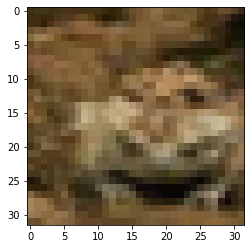

In [ ]:
index = 2101
print('Predicted label: ', np.argmax(y_test_pred[index]))
plt.imshow(x_test[index])

Predicted label:  0


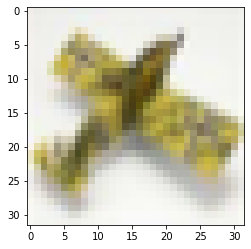

In [ ]:
index = 6872
print('Predicted label: ', np.argmax(y_test_pred[index]))
plt.imshow(x_test[index])

*Nhận xét*: Ta thấy
 + Với index trong tập test là *2101*, bức ảnh cho ta thấy là con ếch, thuộc vào nhãn số `6`, trong khi đó, mô hình cho ra dự đoán với ảnh trên, nhãn tương ứng là nhãn số `0`, tức là máy bay. Do đó, kết quả dự đoán của mô hình với ảnh này là `False`.
 + Với index trong tập test là *6872*, bức ảnh cho ta thấy là máy bay, thuộc vào nhãn số `0`, trong khi đó, mô hình cho ra dự đoán với ảnh trên, nhãn tương ứng là nhãn số `0`, tức là máy bay. Do đó, kết quả dự đoán của mô hình với ảnh này là `True`.